In [75]:
from data_ingestion.pipeline_manager import PipelineRunner as PipelineRunner 
from data_ingestion import utilities as util
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
path = "Messungen"
pipeline = None
origin = "SensorLogger"

runner = PipelineRunner(path)
runner.set_origin(origin)
runner.set_pipeline(pipeline)
data_from_run = runner.run()
path: pathlib.Path = "Export.arrow"
data_from_run.write_ipc(path)


Read Files:   0%|          | 0/106 [00:00<?, ?files/s]

In [77]:
# get all user value in data_from_run
data_from_run

time,Accelerometer_x,Accelerometer_y,Accelerometer_z,id,user,class
datetime[ms],f64,f64,f64,str,str,str
2023-02-28 18:04:28.233,0.315056,-0.504515,-0.112232,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.243,0.31457,-0.516299,-0.104999,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.253,0.298363,-0.521532,-0.107373,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.263,0.23865,-0.543757,-0.075227,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.273,0.490678,-0.540835,0.199549,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.283,0.486232,-0.537629,0.19698,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.293,0.479591,-0.533527,0.193575,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.303,0.471791,-0.529305,0.189957,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""
2023-02-28 18:04:28.313,0.463657,-0.525805,0.186756,"""01_GalaxyS21""","""Tobias_Buess""","""Velofahren"""


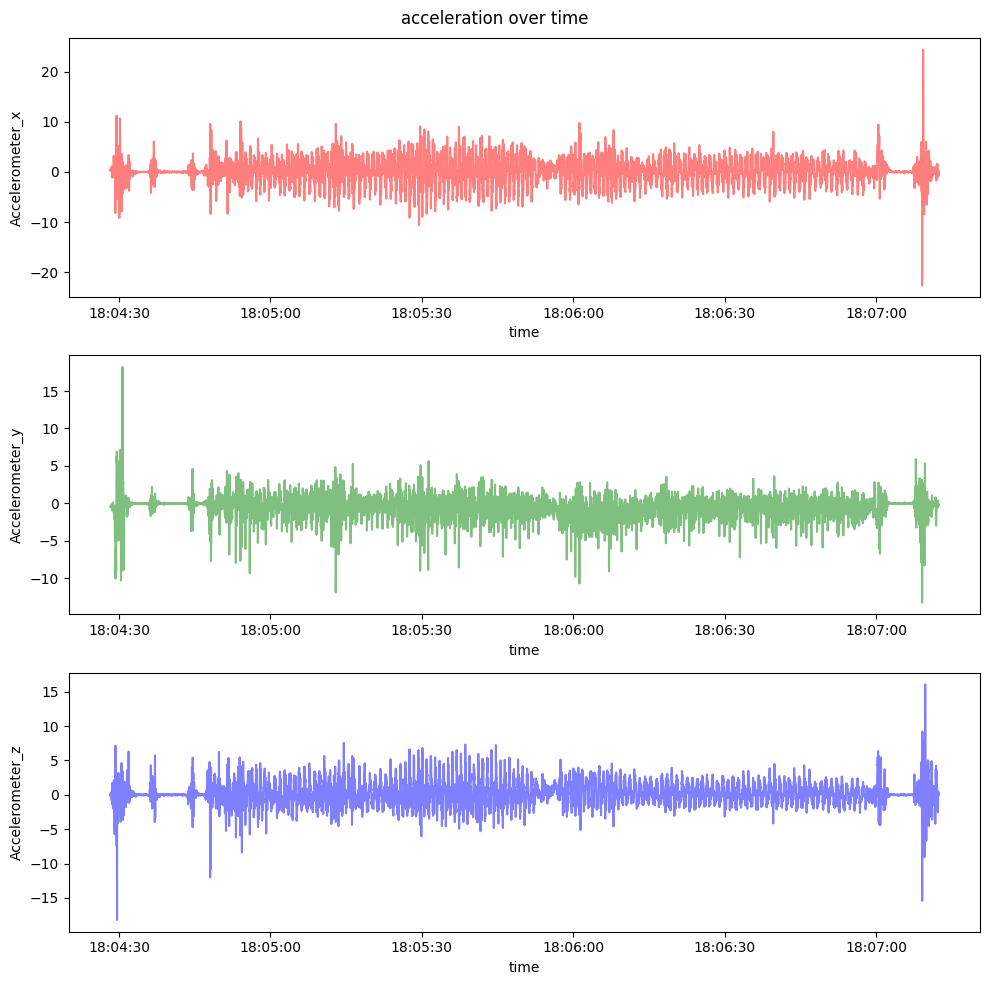

In [78]:
# create 3 subplots for each accelerometer axis
def plot_accelerometer_data(data, multipleplots=True, alpha=0.5):
    '''
    plot accelerometer data
    data: polars dataframe
    multipleplots: if True, create 3 subplots for each axis
    alpha: transparency of the lineplot
    
    returns: Seaborn lineplot
    '''
    if multipleplots==True:
        fig, axs = plt.subplots(3, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Accelerometer_x", ax=axs[0], color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_y", ax=axs[1], color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_z", ax=axs[2], color="blue", alpha=alpha)
        fig.suptitle("acceleration over time")
        fig.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 1, figsize=(10, 10))
        sns.lineplot(data=data, x="time", y="Accelerometer_x", color="red", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_y", color="green", alpha=alpha)
        sns.lineplot(data=data, x="time", y="Accelerometer_z", color="blue", alpha=alpha)
        axs.set_xlabel("time")
        axs.set_ylabel("acceleration")
        axs.set_title("acceleration over time")
        plt.show()

plot_accelerometer_data(data_from_run, multipleplots=True, alpha = 0.5)

In [79]:
# TESTING Type full typing of tensors

A = util.State.to_numpy([
    util.State(util.User.ETIENNE, util.Activity.SITZEN),
    util.State(util.User.BEN, util.Activity.STEHEN),
    util.State(util.User.LEA, util.Activity.LAUFEN),
    util.State(util.User.FLORIN, util.Activity.RENNEN),
    util.State(util.User.GABRIEL, util.Activity.FAHRRAD),
    util.State(util.User.MANJAVY, util.Activity.TREPPENGEHEN),
    util.State(util.User.OGNJEN, util.Activity.SITZEN),
    util.State(util.User.TOBIAS, util.Activity.STEHEN),
    util.State(util.User.WEIPING, util.Activity.LAUFEN),  
 ], batch=True)

tf.convert_to_tensor(A)

<tf.Tensor: shape=(9, 16), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)>